This technique gives you a score for each feature of your data,the higher the score mor relevant it is

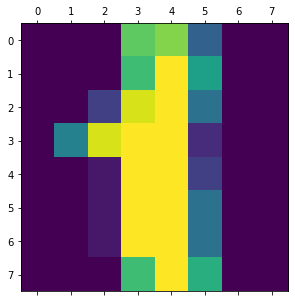

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
df=load_digits()
X = df.data
y = df.target
plt.matshow(df.images[1])

<AxesSubplot:>

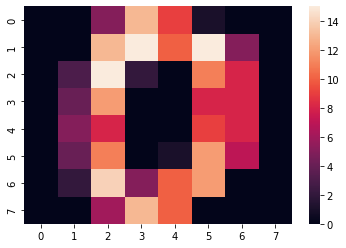

In [2]:
sns.heatmap(df.images[0])

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(criterion='entropy')
et.fit(X,y)
et.feature_importances_

array([0.00000000e+00, 2.00277887e-03, 1.73027295e-02, 8.84813345e-03,
       6.75636882e-03, 1.79108899e-02, 6.80457370e-03, 4.91181596e-04,
       4.77069124e-05, 9.51951659e-03, 2.60582647e-02, 5.64758765e-03,
       1.08163384e-02, 2.88177654e-02, 4.64740825e-03, 6.85537815e-04,
       6.39742876e-05, 6.45555413e-03, 2.19860136e-02, 2.16691428e-02,
       3.50463236e-02, 5.42383250e-02, 7.73664484e-03, 2.24720205e-04,
       6.92526375e-05, 1.06914982e-02, 4.57218694e-02, 2.50694411e-02,
       3.44587082e-02, 2.24087022e-02, 2.43299310e-02, 4.61514694e-06,
       0.00000000e+00, 2.75142916e-02, 3.67788008e-02, 1.98417041e-02,
       3.61195648e-02, 1.96657561e-02, 2.47701528e-02, 0.00000000e+00,
       2.15818991e-05, 5.99178235e-03, 5.21015358e-02, 5.14250669e-02,
       2.49021046e-02, 1.73387759e-02, 2.08680925e-02, 8.14294541e-05,
       5.85502156e-05, 2.31941697e-03, 1.95166111e-02, 1.41724267e-02,
       1.32869356e-02, 2.59667684e-02, 2.30198718e-02, 1.70997851e-03,
      

In [4]:
et.feature_importances_.shape

(64,)

<AxesSubplot:>

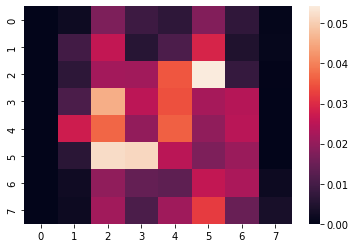

In [5]:
sns.heatmap(et.feature_importances_.reshape(8,8)) # all pixeles in the whole dataset are covering this area 

### Titanic dataset

In [6]:
df2=sns.load_dataset('titanic')
df2['sex']=np.where(df2['sex']=='male',1,0)
df2.dropna(inplace=True)
X1=df2[['pclass','sex','age','sibsp','parch','fare']]
y1=df2.survived
et2=ExtraTreesClassifier(criterion='entropy')
et2.fit(X1,y1)
et2.feature_importances_

array([0.03573978, 0.2535063 , 0.32173945, 0.04793062, 0.05603002,
       0.28505383])

In [7]:
df3=pd.DataFrame({'feature':X1.columns , 'Importances':et2.feature_importances_})
df3.sort_values(['Importances'],ascending=False)

,feature,Importances
2,age,0.321739
5,fare,0.285054
1,sex,0.253506
4,parch,0.056030
3,sibsp,0.047931
0,pclass,0.035740


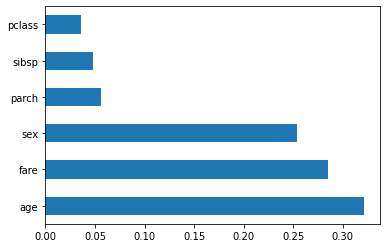

In [9]:
ranked_features=pd.Series(et2.feature_importances_,index=X1.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
